In [1]:
import librosa
import librosa.display
import os
import numpy as np
import math



In [2]:
audio_path = r"C:\Users\Salma\Downloads\TORGO"
files = os.listdir(audio_path)
all_wave = []
all_label = []
mfcc_features = []
ignored = {"Notes", "phn_arrayMic", "amps", "rawpos", "wavall", "pos", "alignment", "Cpcmd", "EMA", "VIDEO", "wav_headMic", "normpos", "log"}

In [3]:
num_segments=5
hop_length=512
n_fft=2048
num_mfcc=13
SAMPLE_RATE = 16000
AUDIO_DURATION = 10 # measured in seconds
SAMPLES_PER_AUDIO = SAMPLE_RATE * AUDIO_DURATION
samples_per_segment = int(SAMPLES_PER_AUDIO / num_segments)
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)



In [4]:
%%time

for file in files:
    for subfile in os.listdir(audio_path + '/'):
        
        for session in [s for s in os.listdir(audio_path + '/' + subfile +'/')if s not in ignored]:
            for subsession in [x for x in os.listdir(audio_path + '/'+ subfile +'/'+ session + '/')if x not in ignored]:
                for data in [y for y in os.listdir(audio_path + '/'+ subfile +'/'+ session + '/' +subsession +'/') if y not in ignored]:
                    
                    waves = [f for f in os.listdir(audio_path + '/' + subfile +'/'+ session +'/' + subsession +'/' + data + '/')if f.endswith('.wav')]
                    labels = [L for L in os.listdir(audio_path + '/' + subfile +'/'+ session +'/' + subsession + '/' + data + '/')if L.endswith('.txt')]

                    for wav in waves:
                        try:
                            
                        
                            signal, sample_rate = librosa.load(audio_path + '/' + subfile +'/'+ session + '/'+subsession +'/'+ data +'/'+ wav, sr = 16000, duration =  AUDIO_DURATION , res_type='kaiser_fast')
                            signal = librosa.resample(signal, sample_rate, 16000)
                        
                            #mfcc = librosa.feature.mfcc(signal[signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, duration = AUDIO_DURATION)
                            #mfcc = mfcc.T    
                                                               
                            dur = librosa.get_duration(y=signal, sr=sample_rate)  
                            if (round(dur) < SAMPLES_PER_AUDIO):
                                    y = librosa.util.fix_length(signal, SAMPLES_PER_AUDIO)                
                
                                    # extract normalized mfcc feature from data
                                    mfccs = np.mean(librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=40).T,axis=0)             
                        except Exception as e:
                            print("Error encountered while parsing file: ", wav)     
                                                               
                                                               
                        feature = np.array(mfccs).reshape([-1,1])
                        mfcc_features.append(feature)  
                                                               
                        all_wave.append(signal)
                            
                                
                       # mfcc_features.append(mfcc.tolist())
                                
                    for label in labels:
                        file_path = audio_path + '/' + subfile + '/' + session + '/' + subsession + '/' + data +'/'+ label
                        l = open(file_path, "r")
                        for target in l:
                        
                            all_label.append(target.strip())
                        


C:\Users\Salma\Anaconda3\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=0
  n_fft, y.shape[-1]


Error encountered while parsing file:  0256.wav
Error encountered while parsing file:  0256.wav
Error encountered while parsing file:  0256.wav
Error encountered while parsing file:  0256.wav
Wall time: 24min 29s


In [7]:
print(all_label[:20])
print(len(all_label))

['[say Ah-P-Eee repeatedly]', '[say Ah-P-Eee repeatedly]', '[say Pah-Tah-Kah repeatedly]', '[say Eee-P-Ah repeatedly]', '[relax your mouth in its normal position]', 'stick', 'tear [as in tear up that paper]', 'Except in the winter when the ooze or snow or ice prevents,', 'pat', 'up', 'meat', 'meat', 'know', 'he slowly takes a short walk in the open air each day.', 'air', 'swarm', 'double', 'no', 'storm', 'Usually minus several buttons.']
37976


In [5]:
print(all_wave[0])
print(len(all_wave))

[2.1362305e-04 2.7465820e-04 9.1552734e-05 ... 4.1778564e-02 4.4006348e-02
 5.2520752e-02]
37668


In [6]:
print(mfcc_features[0])
print(len(mfcc_features))

[[-224.21306   ]
 [  72.94931   ]
 [ -14.522216  ]
 [ -16.339384  ]
 [ -25.01845   ]
 [ -23.227844  ]
 [  -7.672507  ]
 [  -8.478441  ]
 [ -11.233618  ]
 [   5.487371  ]
 [  -3.032888  ]
 [  -3.3023393 ]
 [  -2.489651  ]
 [  -8.348123  ]
 [ -16.205877  ]
 [   0.42632586]
 [  -6.665788  ]
 [  -2.8840284 ]
 [  -6.6221347 ]
 [ -10.456499  ]
 [  -3.6583588 ]
 [  -1.2425839 ]
 [ -15.98888   ]
 [   4.2269654 ]
 [   8.152516  ]
 [  14.13198   ]
 [   6.8732743 ]
 [   9.226517  ]
 [   5.154295  ]
 [  -0.7964234 ]
 [  -6.3020616 ]
 [  -0.25740406]
 [  -2.2581935 ]
 [  -1.2106955 ]
 [  -7.3542924 ]
 [  -0.7877622 ]
 [  -6.013841  ]
 [  -1.7744093 ]
 [  -5.426818  ]
 [  -2.8802128 ]]
37668


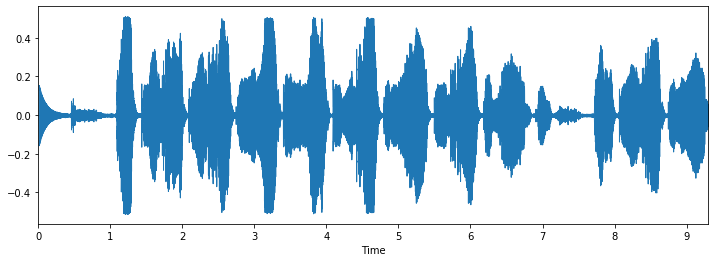

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,4))
librosa.display.waveplot(all_wave[0], sr = sample_rate )

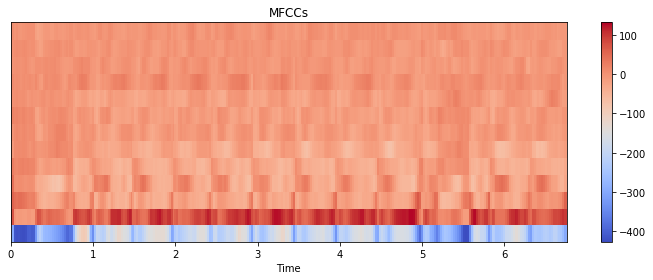

In [10]:
MFCCs = librosa.feature.mfcc(all_wave[0], sample_rate, n_mfcc=13)

# display MFCCs
plt.figure(figsize=(10,4))
librosa.display.specshow(MFCCs, x_axis = 'time')
plt.colorbar()
plt.title("MFCCs")
plt.tight_layout()
plt.show()

In [5]:
MFCCs = librosa.feature.mfcc(all_wave[0], sample_rate, n_mfcc=13)
MFCCs = MFCCs.T
print(MFCCs)

[[-2.53023895e+02  8.79376450e+01  4.96896515e+01 ...  2.04245806e+00
  -5.27361035e-01  1.12335739e+01]
 [-2.98888184e+02  7.42969666e+01  5.92756157e+01 ...  2.75989652e+00
   3.79270291e+00  7.43510628e+00]
 [-4.15626770e+02 -2.58615732e+00  4.66258316e+01 ...  3.92027140e+00
   9.39003181e+00  1.10144722e+00]
 ...
 [-2.42735489e+02  9.91007614e+01  8.90728188e+00 ...  7.04494286e+00
  -1.51766014e+01 -6.90137625e+00]
 [-2.64057281e+02  1.07377914e+02  2.99488049e+01 ... -6.05578423e-02
  -6.94904995e+00 -7.46702099e+00]
 [-2.97669220e+02  9.95014648e+01  5.83330002e+01 ... -5.35106945e+00
  -3.99188590e+00 -5.59383106e+00]]


In [5]:
X = np.array(mfcc_features)
X.shape

(37668, 40, 1)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(all_label)
classes = list(le.classes_)


In [7]:
from keras.utils import np_utils
y = np_utils.to_categorical(y, num_classes = len(labels))
y = np.array(y)
#x = np.array(all_wave)  

In [8]:
y.shape

(37976, 1009)

In [9]:
y = y[:-308]

In [10]:
y.shape

(37668, 1009)

()

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)